# In Class Notebook, Week 04

You can click on the GitHub URL of this notebook to access the file in near-real time: https://github.com/UIUC-iSchool-DataViz/is445_oauoag_fall2022/blob/master/week04/inClass_week04.ipynb 

Or you can copy-paste into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
import ipywidgets

In [3]:
michigan_file = '/Users/chenghsuanlin/Downloads/michigan_lld.flt'
michigan = np.fromfile(michigan_file, dtype='f4').reshape((5365,4201))
# for this reshape, check out the link to the NOAA site for where this comes from:
#. https://www.ngdc.noaa.gov/mgg/greatlakes/michigan.html

In [4]:
michigan[michigan==-9999] = np.nan

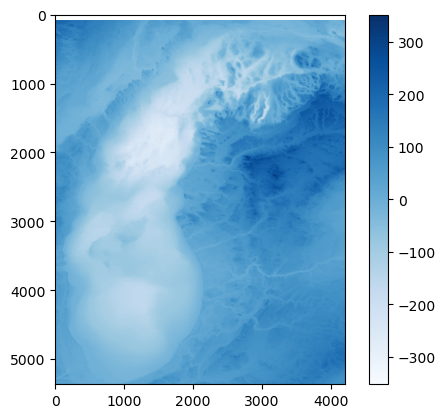

In [5]:
# step 1: hardcode some options we want to make interactive
colormap_name = 'Blues'
#take_log = True

plt.imshow(michigan, cmap=colormap_name)
plt.colorbar()
plt.clim(-352,352)
plt.show()

/Users/chenghsuanlin/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  import sys


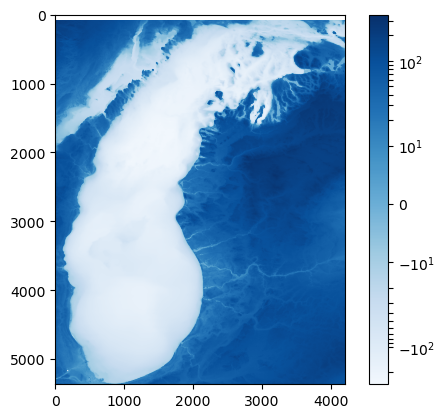

In [6]:
# step 1: hardcode some options we want to make interactive
colormap_name = 'Blues'
take_log = True

if take_log:
    # compressing data into few colors
    norm = matplotlib.colors.SymLogNorm(10)
else:
    # linear normalization
    norm = matplotlib.colors.Normalize()

plt.imshow(michigan, cmap=colormap_name, norm = norm)
plt.colorbar()
plt.clim(-352,352)
plt.show()

In [7]:
1, 5, 50

(1, 5, 50)

In [8]:
np.log10([1,5,50])

array([0.     , 0.69897, 1.69897])

In [9]:
-1,-5,-50

(-1, -5, -50)

In [10]:
-np.log10(np.abs([-1,-5,-50]))

array([-0.     , -0.69897, -1.69897])

In [11]:
# 2. turn hard-coded options into a function
#colormap_name = 'Blues'
#take_log = True

def make_michigan_plot(colormap_name, take_log=True):
    # on a mac --> select lines --> COMMAND ]
    if take_log:
        # compressing data into few colors
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        # linear normalization
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan, cmap=colormap_name, norm = norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

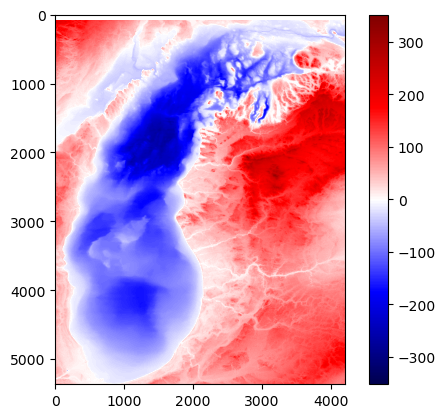

In [12]:
make_michigan_plot('seismic',take_log=False)

In [13]:
# 3. decorate our function with a ipywidgets.interact
# with options in the function as parameters in @ipywidgets.interact decorator
@ipywidgets.interact(colormap_name=plt.colormaps(), take_log=True)
def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan, cmap=colormap_name, norm = norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

interactive(children=(Dropdown(description='colormap_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r',…

In [14]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

## Building up interfaces with ipywidgets

In [15]:
ip = ipywidgets.IntProgress(value = 90)
ip

IntProgress(value=90)

In [16]:
irange = ipywidgets.IntSlider(min = 0, max = 100, step = 1)
irange

IntSlider(value=0)

In [17]:
ip.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'bar_style',
 'description',
 'description_tooltip',
 'layout',
 'max',
 'min',
 'orientation',
 'style',
 'value']

In [18]:
irange.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [19]:
ip

IntProgress(value=90)

In [20]:
ip.value=10

In [21]:
ipywidgets.jslink?

In [22]:
ipywidgets.jslink((ip,'value'), (irange,'value'))

Link(source=(IntProgress(value=10), 'value'), target=(IntSlider(value=0), 'value'))

In [23]:
ip

IntProgress(value=10)

In [24]:
irange

IntSlider(value=0)

In [25]:
ipywidgets.VBox([ip, irange])

In [26]:
ip2 = ipywidgets.IntProgress(value = 70)
irange2 = ipywidgets.IntSlider(min = 0, max = 100, step = 1)
ipywidgets.link((ip2,'value'), (irange2,'value')) # here is the change: "jslink" changes to "link"
ipywidgets.VBox([ip2, irange2])

In [27]:
ipywidgets.link?

In [28]:
button = ipywidgets.Button(description = "I am a button.")
button

Button(description='I am a button.', style=ButtonStyle())

In [29]:
# let's just say I've clicked:
def say_click(event): # event?
    print("I have been clicked!")

In [30]:
button.on_click(say_click) # what happens when I click ot the "say click" function

In [31]:
ip = ipywidgets.IntProgress()

In [32]:
button_plus = ipywidgets.Button(description = "+10")
button_minus = ipywidgets.Button(description = "-10")

In [33]:
ipywidgets.HBox([button_minus, ip, button_plus])

In [34]:
ip.value

0

In [35]:
ip.value = 50

In [36]:
def button_click_plus(event): # event?
    #print(event)
    ip.value += 10 # ip.value = ip.value + 10

In [37]:
button_plus.on_click(button_click_plus)

In [38]:
def button_click_minus(event): # event?
    ip.value -= 10
button_minus.on_click(button_click_minus)

In [39]:
islider = ipywidgets.IntSlider(min = 0, max = 10, step = 1, orientation = 'vertical')
islider

IntSlider(value=0, max=10, orientation='vertical')

In [40]:
islider.style.value

AttributeError: 'SliderStyle' object has no attribute 'value'

In [ ]:
islider.style.keys

In [ ]:
islider.style.handle_color='#FFFF66'

In [ ]:
islider

In [ ]:
cp = ipywidgets.ColorPicker()
cp

In [ ]:
ipywidgets.link((cp,'value'),(islider.style, 'handle_color'))

## Traitlets

In [ ]:
class MyObject():
    name = 'unnamed'
    age = -1

In [ ]:
my_obj = MyObject()

In [ ]:
my_obj.name, my_obj.age

In [ ]:
myobj.name = 'Bob'
myobj.age = 47

In [ ]:
myobj.name, myobj.age

In [ ]:
print('Hello my name is:',myobj.name, 'and I am', myobj.age, 'years old')

In [ ]:
myobj.name = 'Linda'
myobj.age = 45

In [ ]:
print('Hello my name is:',myobj.name, 'and I am', myobj.age, 'years old')

In [ ]:
import traitlets

In [ ]:
class MyTraitletsObject(traitlets.HasTraits):
    name = traitlets.Unicode("unnamed") #fancy way of saying "string"
    age = traitlets.Int(-1) #fancy way of saying Int

In [ ]:
myobj.name = MyTraitletsObject()
myobj.age = 47
myobj.name = 'Bob'

In [ ]:
print('Hello my name is:',myobj.name, 'and I am', myobj.age, 'years old')

In [ ]:
def name_changed(change): #sort of like the mysterious "event", but there are more details
    print(change)
    
myobj.observe(name_changed, ['name']) # looking for changes in "name" trait of myobj

In [ ]:
def name_changed(change):
    print(change) # this is a format that is required of a traitlets class

# lets tell traitlets that we are going to change something
my_t_obj.observe(name_changed, ['name'])

In [ ]:
mytobj.name = "Linda"

In [ ]:
def age_changed(change):
    print('Hello, my name is', change['owner'].name, 'and I am', change['new'], 'years old')

mytobj.observe(age_changed, ['age'])

In [ ]:
mytobj.age

In [ ]:
my_t_obj.age = 48


In [ ]:
my_t_obj.name, my_t_obj.age = 'Louise', 8

In [ ]:
my_t_obj.name = "Louise"
my_t_obj.age = 8

## More fun things with widgets!

In [ ]:
tx1 = ipywidgets.Textarea("Hi, I am a text box (1)")

In [ ]:
tx1

In [ ]:

tx2 = ipywidgets.Textarea("Hi, this is a box of text. (2)")

tx3 = ipywidgets.Textarea("Hi, this is a box of text. (3)")

tx4 = ipywidgets.Textarea("Hi, this is a box of text. (4)")

In [ ]:
tabs = ipywidgets.Tab([tx1, ta2, ta3, ta4])
tabs

In [ ]:
ipywidgets.VBox([ta1, ta2, ta3, ta4])

In [ ]:
pywidgets.VBox( [ipywidgets.HBox([ta1, ta2]),
                  ipywidgets.HBox([ta3, ta4])] )